In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import bokeh
import seaborn as sns
warnings.filterwarnings("ignore")

In [172]:
df = pd.read_csv('kdrama.csv')

In [173]:
df

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Genre,Director,Writer,Year,No of Episodes,Network
0,Legend of the Blue Sea,8.1,"Jun Ji-hyun, Lee Min-ho",17.600,"Fantasy,Romance,Comedy","Jin Hyuk, Park Seon-Ho",Park Ji-eun,2016,21,SBS
1,The Heirs,7.5,"Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park H...",16.700,"Romance, Drama, Teen","Kang Shin-hyo, Boo Sung-chul",Kim Eun-sook,2013,20,SBS
2,The King: Eternal Monarch,8.3,"Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyung...",7.700,"Romance, Fantasy, Drama","Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won",Kim Eun-sook,2020,16,SBS
3,Boys over Flowers,7.9,"Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim Bu...",25.700,"Romance, Comedy, Drama",Jeon Ki-sang,Yoon Ji-ryun,2009,25,KBS
4,Guardian: the lonely and the great god,8.6,"Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-na...",12.810,"Fantasy, Romance, Drama","Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho",Kim Eun-sook,2016,18,TvN
...,...,...,...,...,...,...,...,...,...,...
236,King the land,4.5,"Lee Jun-ho, Im Yoon-ah",10.205,"Romance, Comedy",Im Hyun-wook,Choi Rom,2023,16,JTBC
237,A time called you,7.8,"Ahn Hyo-seop, Jeon Yeo-been, Kang Hoon",6.000,"Time-travel, Mystery, Romance",Kim Jin-won,Choi Hyo-bi,2023,12,Netflix
238,My lovely liar,7.5,"Kim So-hyun, Hwang Min-hyun, Seo Ji-hoon, Lee ...",2.928,"Mystery, Romance, Comedy",Nam Sung-woo,Seo Jeong-eun,2023,16,TvN
239,Behind the touch,7.4,"Han Ji-min, Lee Min-ki, Suho",7.057,"Comedy, Drama, Suspense, Thriller, Fantasy","Kim Seok-yoon, Choi Bo-yoon","Lee Nam-gyu, Oh Bo-hyeon, Kim Da-hee",2023,16,JTBC


In [174]:
def formatting(lst):
    for col in lst:
        for i in range(df.shape[0]):
            df[col][i] = df[col][i].split(',')

        for i in range(df.shape[0]):
            for j in range(len(df[col][i])):
                df[col][i][j] = df[col][i][j].lstrip()
        
    

In [175]:
format_col = ['Actors','Genre','Director','Writer']

In [176]:
formatting(format_col)

Genre List

In [177]:
g_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Genre'][i])):
        g_list.append(df['Genre'][i][j])
Genre_list = list(set(g_list))
Genre_list = Genre_list[1:]

print(Genre_list)

['Music', 'Workplace', 'Medical', 'Mystery', 'Teen', 'Science fiction', 'Revenge', 'Crime', 'Horror', 'Youth', 'Period', 'Time-travel', 'Drama ', 'Spy', 'Family', 'Body swap', 'Action ', 'Politics', 'Military', 'Drama', 'Comedy', 'legal', 'Fantasy', 'Comedy ', 'Coming-of-age ', 'Suspense', 'Slice-of-life', 'Legal', 'Dark Comedy', 'Action', 'Life', 'Sports', 'Slice of life', 'Romance', 'Survival', 'Satire', 'Romance ', 'Crime ', 'Coming-of-age', 'Historical', 'Thriller', 'Musical']


Network List

In [179]:
Network_list = df['Network'].unique().tolist()
print(Network_list)

['SBS', 'KBS', 'TvN', 'OCN', 'MBC', 'JTBC', 'KakaoTV', 'Naver TV Cast', 'MBN', 'Netflix', 'WAVVE', 'Disney+', 'Apple TV+', 'KBS ', 'ENA', 'Youtube Originals', 'TVING']


Actors List

In [180]:
a_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Actors'][i])):
        a_list.append(df['Actors'][i][j])
Actors_list = list(set(a_list))

print(len(Actors_list))

625


Directors List

In [181]:
d_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Director'][i])):
        d_list.append(df['Director'][i][j])
Directors_list = list(set(d_list))

print(Directors_list)


['Park Hyun-suk', 'Han Hee', 'Kogonada', 'Shim Soo-yeon', 'Kim Jung-hyun', 'Park Sun-young', 'Myung Hyun-woo', 'Mo Wan-li', 'Park Joon-woo', 'Kang Cheol-woo', 'Park Dhan-hee', 'Yoon Jong-ho', 'Hae Tae-seop', 'Yoo je-won', 'Kwak Jung-hwan', 'Kim Seong-yoon', 'Yoo In-sik', 'Lee Woong-hee', 'Baek Sang-hoon', 'Kim Seong-hun', 'Yoon Sang-ho', 'Kim Tae-yoon', 'Lee Min-woo', 'Jeong Sang-her', 'Shin Seung-won', 'Hong Moon-pyo', 'Kang In', 'Park Bong-seop', 'Kim Byung-soo', 'Nam Ki-Hoon', 'Choi Bo-yoon', 'Kim Jin-woo', 'Kim Dae-jin', 'Han Chul-soo', 'Tae-gon Lee', 'Choi Sung-bum', 'Park Jin-woo', 'Park Sun-ho', 'Kim Seong-jin ', 'Son Jung-hyun', 'Jeong Jeong-hwa', 'Yoon Sung-ho', 'Lee Myung-woo', 'Kim Min-kyeong', 'Nam Sung-woo', 'Hwang In-hyuk', 'Kim Hee-won', 'Oh Jong-rok', 'Kang Shin-hyo', 'Lee Gil-bok', 'Lee Min-soo', 'Jo Woong', 'Lee Soo-hyun', 'Lee Shi-young ', 'Yoo Young-eun ', 'Park Seon-Ho', 'Park Joon-hwa', 'Bae Jong', 'Seo Min-jung', 'Kim Young-hwan ', 'Shin Won-ho', 'Park Jin-suk', 

Writers List

In [182]:
w_list = []
for i in range(df.shape[0]):
    for j in range(len(df['Writer'][i])):
        w_list.append(df['Writer'][i][j])
Writers_list = list(set(w_list))

print(Writers_list)


['Kim Da-hee', 'Kang Go-eun', 'Jeon Yu-ri', 'Kwon Hee-kyung ', 'Park Hae-young', 'Lee Jae-yoon', 'Heo Jun-woo', 'Hong Jung-eun', 'Seo Sook-hyang', 'Chun Ji-hye', 'Kang Yi-heon', 'Min Hyo-jung', 'Choi Hyo-bi', 'Im Young-bin', 'Park Seul-gi', 'Im Jin-seon', 'Lee Nam-gyu', 'Huh Young-man', 'Jeong Seo-kyung', 'Kim Sun-mi', 'Choi Sung-joon', 'Jung Kyung-soon', 'Yoon Hyun-ho', 'Jung Yi-do', 'Jung Hyung-soo', 'Lim Jung-min', 'Kim Hye-young', 'Lee Si-eun', 'Ahn Sae-bom', 'Lee Soo-yeon', 'Choi Young-woo', 'Oh Bo-hyun', 'Jung Jae-in', 'Im Sang-choon', 'Chae Yoon', 'Hong Moon-pyo', 'Seo Eun-jung', 'Jung Chan-mi', 'Lee Hee-myung', 'Hwang Da-seul', 'Lee Mi-na', 'Kim Eun-hee', 'Kim Ho-jun ', 'J', 'Kim Jung-hee', 'Ryu Bo-ri', 'Kim Hwan-chae', 'Jung Hae-ri', 'Yoo Yeong-ah', 'Lee Sun-hye', 'Oh Ji-young', 'Im Me-a-ri', 'Seo Jeong-sun', 'Kim Seung-won', 'Jeong Jeong-hwa', 'Park Hye-ryun', 'Han Sang-woon', 'Kim Jeong-hee', 'Kim Joo-hee', 'Ha Yoo-ah ', 'Nemone', 'Lee Kyung-hee', 'Yoo Hyun-mi', 'Jo Ryeong-s

Drama List

In [183]:
dr_list = []
for i in range(df.shape[0]):
    dr_list.append(df['Drama Name'][i])
Drama_List = dr_list


### Networking Companies

In [127]:
network = df.copy()

In [128]:
a = network.groupby(by="Network").sum()

Text(0, 0.5, 'Popularity')

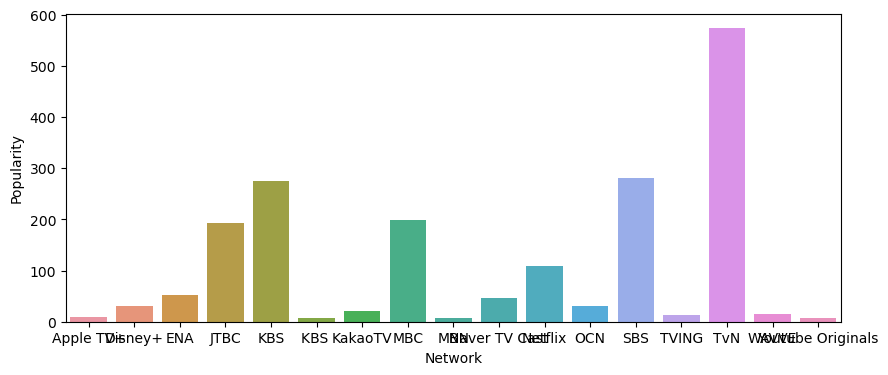

In [129]:
plt.figure(figsize=(10,4))
sns.barplot(x=a.index,y='Rating(Out of 10)',data=a)
plt.ylabel("Popularity")

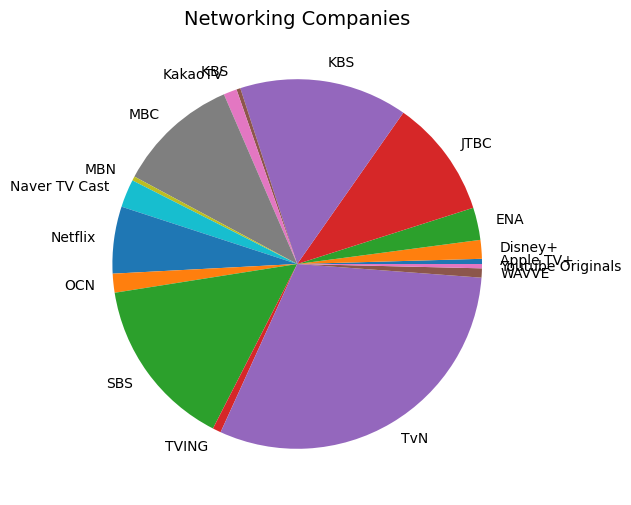

In [130]:
pie, ax = plt.subplots(figsize=[10,6])
labels = a.index.tolist()
plt.pie(x=a['Rating(Out of 10)'].tolist(), labels=labels, pctdistance=0.5)
plt.title("Networking Companies", fontsize=14);


In [131]:
d = dict()

In [132]:
def genre_dictionary(com_list):
    dictionary_list = []
    for c in com_list:
        a = network.loc[:,('Genre','Network')]
        b = a[a['Network'] == c]
        d = dict((g,0) for g in Genre_list)
        for i in (b.index.to_list()):
            for j in range(len(b['Genre'][i])):
                for k in Genre_list:
                    if b['Genre'][i][j] == k:
                        d[k] +=1
        dictionary_list.append(d)
        
    return dictionary_list

    
    
    

In [133]:
dic = genre_dictionary(Network_list)

In [134]:
for i,j in zip(Network_list,dic):
    d[i] = j

In [135]:
netdata = pd.DataFrame.from_dict(d, orient ='index') 


In [136]:
#Piechart
def network_piechart(nw):
    d = netdata[netdata.index == str(nw)]
    plt.figure(figsize=(9,9))
    net_list = []
    for i in range(1):
        for j in range(d.shape[1]):
            if d.iloc[i,j] == 0:
                pass
            else:
                net_list.append(d.columns[j])
    Genre = net_list


    Value = list(filter(lambda a: a != 0,d.iloc[0,:].tolist()))


    # Pie Chart
    plt.pie(Value, labels=Genre,
            autopct='%1.1f%%', pctdistance=0.9)

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # Adding Title of chart
    plt.title(nw)

    # Displaing Chart
    plt.show()

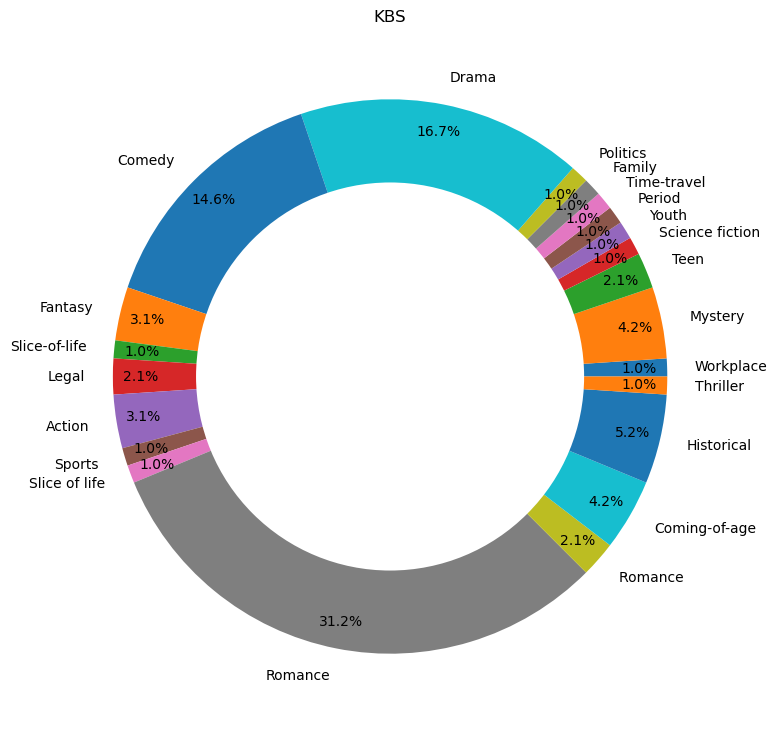

In [137]:
network_piechart('KBS')

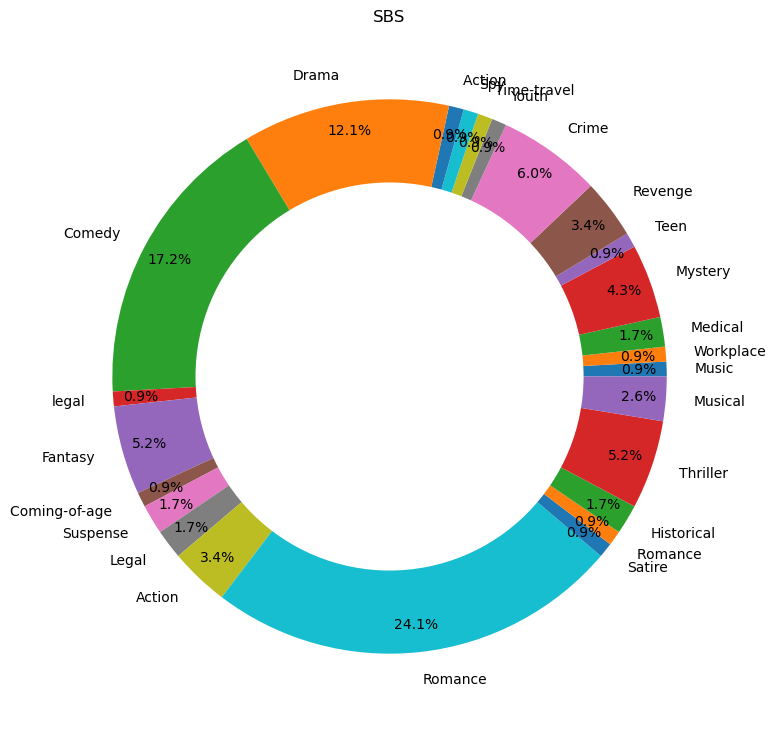

In [138]:
network_piechart('SBS')

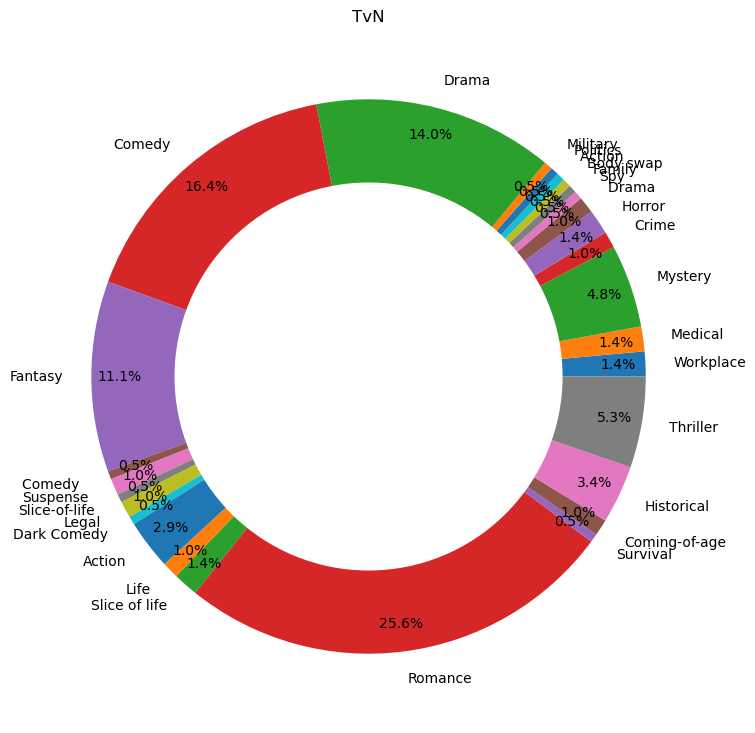

In [139]:
network_piechart('TvN')

## Actors

In [140]:
actors = df.copy()
actors

,Drama Name,Rating(Out of 10),Actors,Viewship Rate,Genre,Director,Writer,Year,No of Episodes,Network
0,Legend of the Blue Sea,8.1,"[Jun Ji-hyun, Lee Min-ho]",17.600,"[Fantasy, Romance, Comedy]","[Jin Hyuk, Park Seon-Ho]",[Park Ji-eun],2016,21,SBS
1,The Heirs,7.5,"[Lee Min-ho, Park Shin-hye, Kim Woo-bin, Park ...",16.700,"[Romance, Drama, Teen]","[Kang Shin-hyo, Boo Sung-chul]",[Kim Eun-sook],2013,20,SBS
2,The King: Eternal Monarch,8.3,"[Lee Min-ho, Kim Go-eun, Woo Do-hwan, Kim Kyun...",7.700,"[Romance, Fantasy, Drama]","[Baek Sang-hoon, Jung Ji-hyun, Yoo Je-won]",[Kim Eun-sook],2020,16,SBS
3,Boys over Flowers,7.9,"[Lee Min-ho, Ku Hye-sun, Kim Hyun-joong, Kim B...",25.700,"[Romance, Comedy, Drama]",[Jeon Ki-sang],[Yoon Ji-ryun],2009,25,KBS
4,Guardian: the lonely and the great god,8.6,"[Gong Yoo, Kim Go-eun, Lee Dong-wook, Yoo In-n...",12.810,"[Fantasy, Romance, Drama]","[Lee Eung-bok, Kwon Hyuk-chan, Yoon Jong-ho]",[Kim Eun-sook],2016,18,TvN
...,...,...,...,...,...,...,...,...,...,...
236,King the land,4.5,"[Lee Jun-ho, Im Yoon-ah]",10.205,"[Romance, Comedy]",[Im Hyun-wook],[Choi Rom],2023,16,JTBC
237,A time called you,7.8,"[Ahn Hyo-seop, Jeon Yeo-been, Kang Hoon]",6.000,"[Time-travel, Mystery, Romance]",[Kim Jin-won],[Choi Hyo-bi],2023,12,Netflix
238,My lovely liar,7.5,"[Kim So-hyun, Hwang Min-hyun, Seo Ji-hoon, Lee...",2.928,"[Mystery, Romance, Comedy]",[Nam Sung-woo],[Seo Jeong-eun],2023,16,TvN
239,Behind the touch,7.4,"[Han Ji-min, Lee Min-ki, Suho]",7.057,"[Comedy, Drama, Suspense, Thriller, Fantasy]","[Kim Seok-yoon, Choi Bo-yoon]","[Lee Nam-gyu, Oh Bo-hyeon, Kim Da-hee]",2023,16,JTBC


In [141]:
A = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network','Viewship Rate')]

In [142]:
drama_list = []
for c in Drama_List:
    a = actors.loc[:,('Drama Name','Rating(Out of 10)','Actors','Genre','Network')]
    b = a[a['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)
        


In [143]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j


What’s wrong with secretary Kim
Fight for my way
She was pretty
Itaewon class
Kill me heal me
Hwarang


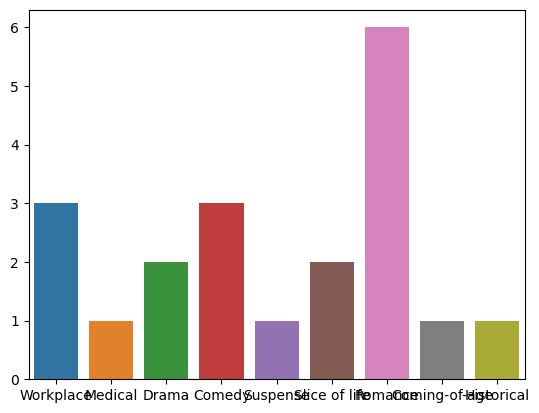

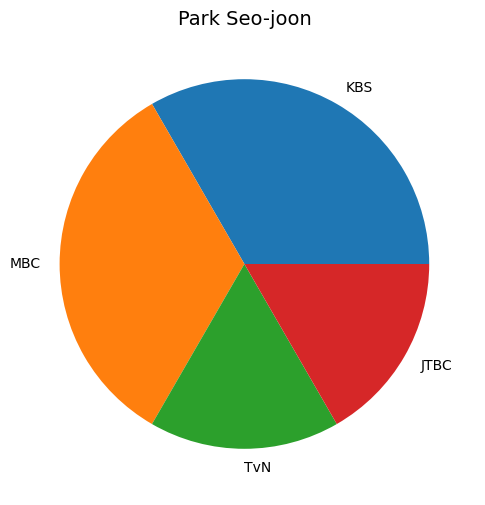

In [144]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
actordata = pd.merge(A,dramadata,on='Drama Name')
actdata = pd.DataFrame(columns = actordata.columns.tolist())
index_ = []
user = input("Enter the actor name:")
for i in range(actordata.shape[0]):
    if user in actordata['Actors'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
        print(actordata['Drama Name'][i])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,6:]

for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1)  
sns.barplot(z.columns.tolist(),z.sum())
pie, ax = plt.subplots(figsize=[10,6])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
plt.title(user, fontsize=14);


TOP 5 Popular Actors/Actress


In [145]:
len(Actors_list)
result1 = 0

In [149]:
index_ = []
act_ = []
for i in range(actordata.shape[0]):
    for j in Actors_list:
        if j in actordata['Actors'][i]:
            act_.append(j)
            index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
result['Actor Name'] = act_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Actors','Network'],axis=1)
result.groupby('Actor Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)


,Rating(Out of 10),Viewship Rate
Actor Name,,
Park Gyu-young,56.9,37.400
Park Shin-hye,53.1,73.580
Lee Dong-wook,48.7,34.499
Park Seo-joon,48.4,58.270
Nam Joo-hyuk,48.2,35.690


## Drama

In [150]:
Drama = df.copy()

In [151]:
Drama = Drama.drop(['Actors','Director','Writer','Network'],axis=1)

In [152]:
drama_list = []
for c in Drama_List:
    b = Drama[Drama['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)
        

In [153]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [154]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Drama = pd.merge(Drama,dramadata,on='Drama Name')
Drama = Drama.drop(['Genre'],axis=1)

In [155]:
Drama

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes,Music,Workplace,Medical,Mystery,Teen,...,Slice of life,Romance,Survival,Satire,Romance,Crime,Coming-of-age,Historical,Thriller,Musical
0,Legend of the Blue Sea,8.1,17.600,2016,21,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Heirs,7.5,16.700,2013,20,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,The King: Eternal Monarch,8.3,7.700,2020,16,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Boys over Flowers,7.9,25.700,2009,25,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Guardian: the lonely and the great god,8.6,12.810,2016,18,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,King the land,4.5,10.205,2023,16,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
237,A time called you,7.8,6.000,2023,12,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
238,My lovely liar,7.5,2.928,2023,16,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
239,Behind the touch,7.4,7.057,2023,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

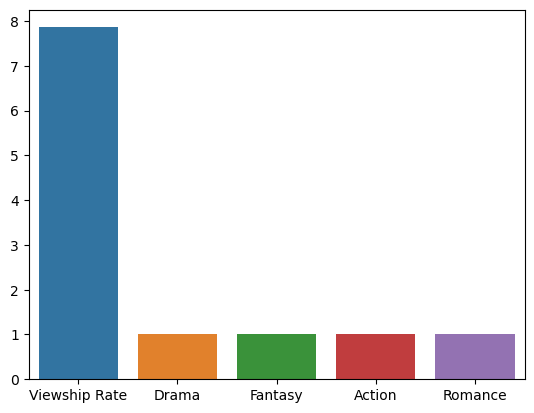

In [158]:
index_ = []
user = input("Enter the Drama name:")
for i in range(Drama.shape[0]):
    if user in Drama['Drama Name'][i]:
        index_.append(actordata[actordata['Drama Name'] == actordata['Drama Name'][i]])
result = pd.concat(index_)
#result.iloc[:,4:].sum()
lst = []
z = result.iloc[:,5:]
for i in range(z.sum().shape[0]):
    if z.sum()[i] == 0:
        lst.append(z.columns[i])   
z = z.drop(lst,axis=1)  
sns.barplot(z.columns.tolist(),z.sum())

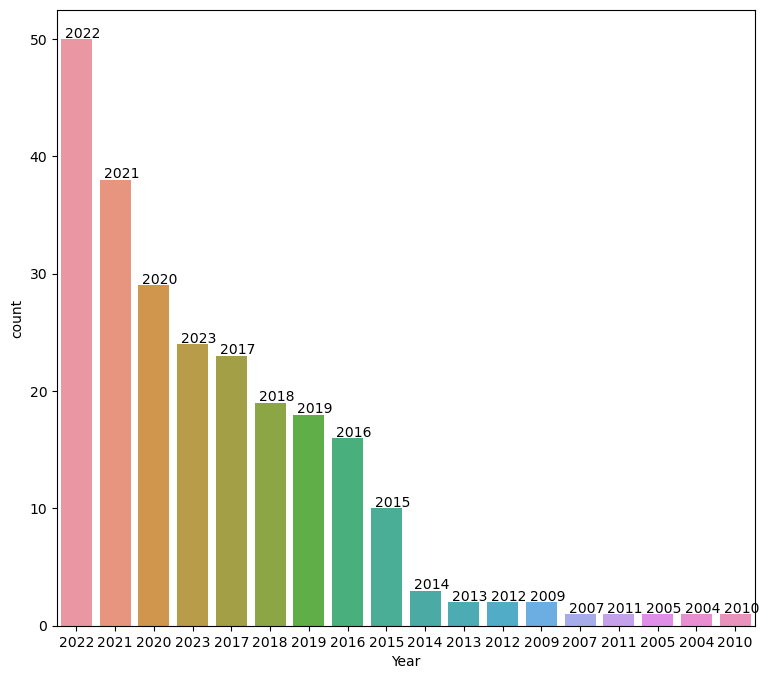

In [159]:
plt.figure(figsize=(9,8))
ax = sns.countplot(Drama["Year"], 
                   order = Drama["Year"].value_counts().index)

for p, label in zip(ax.patches, Drama["Year"].value_counts().index):
    ax.annotate(label, (p.get_x()+0.1, p.get_height()+0.15))

Recommended Top 5 Kdrama Based on :

1. General

In [160]:
Drama.sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
53,Reply 1988,9.1,12.300,2015,20
151,Snowdrop,9.0,2.738,2021,16
88,Mr.queen,8.9,12.580,2020,20
167,Tomorrow,8.9,3.400,2022,16
102,Mr. Sunshine,8.8,12.950,2018,24


2. Year

In [161]:
year = int(input('Enter Year:'))
Drama[Drama['Year'] == year].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
88,Mr.queen,8.9,12.58,2020,20
14,It’s okay to not be okay,8.8,5.42,2020,16
34,Flower of Evil,8.8,3.92,2020,16
83,Hospital Playlist,8.7,10.90,2020,12
82,Handmade Love,8.5,7.70,2020,8


3. Genre

In [162]:
genre = input("Enter your Genre:")
Drama[Drama[genre] == 1].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
53,Reply 1988,9.1,12.300,2015,20
151,Snowdrop,9.0,2.738,2021,16
88,Mr.queen,8.9,12.580,2020,20
102,Mr. Sunshine,8.8,12.950,2018,24
155,Hospital Playlist 2,8.8,12.000,2021,12


4.Number of Episodes

In [116]:
epi = int(input("Enter your atmost number of episodes:"))
Drama[Drama['No of Episodes'] <= epi].sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5).iloc[:,:5]

Enter your atmost number of episodes:16


,Drama Name,Rating(Out of 10),Viewship Rate,Year,No of Episodes
151,Snowdrop,9.0,2.738,2021,16
14,It’s okay to not be okay,8.8,5.420,2020,16
147,Beyond evil,8.8,4.710,2021,16
52,Youth of May,8.8,4.300,2021,12
34,Flower of Evil,8.8,3.920,2020,16


## Director

In [117]:
Director = df.copy()
Director = Director.drop(['Actors','Writer','No of Episodes'],axis=1)

In [118]:
drama_list = []
for c in Drama_List:
    b = Director[Director['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)


In [119]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [120]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Director = pd.merge(Director,dramadata,on='Drama Name')
Director = Director.drop(['Genre'],axis=1)

Enter the Director name:Lee Jung-sub
Healer
Angel’s last mission: Love
Dali and cocky prince

Genres that Director has worked with:
{'Comedy', 'Romance', 'Fantasy', 'Thriller', 'Action'}


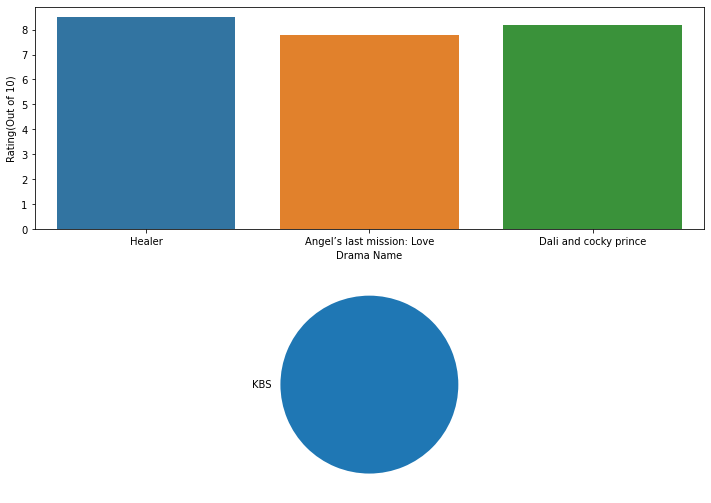

In [122]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Director name:")
for i in range(Director.shape[0]):
    if user in Director['Director'][i]:
        print(Director['Drama Name'][i])
        index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Director has worked with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)     

##### Top 5 Directors

In [123]:
index_ = []
dir_ = []
for i in range(Director.shape[0]):
    for j in Directors_list:
        if j in Director['Director'][i]:
            dir_.append(j)
            index_.append(Director[Director['Drama Name'] == Director['Drama Name'][i]])
result = pd.concat(index_)
result['Director Name'] = dir_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Director','Year','Network'],axis=1)
result.groupby('Director Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Director Name,,
Park Joon-hwa,39.3,20.196
Yoo Je-won,38.8,18.948
Lee Eung-bok,33.2,60.640
Oh Choong-hwan,32.4,37.877
Park Shin-woo,31.5,24.870


## Writer

In [124]:
Writer = df.copy()
Writer = Writer.drop(['Actors','Director','No of Episodes'],axis=1)

In [125]:
drama_list = []
for c in Drama_List:
    b = Writer[Writer['Drama Name'] == c]
    drama = dict((g,0) for g in Genre_list)
    for i in (b.index.to_list()):
        for j in range(len(b['Genre'][i])):
            for k in Genre_list:
                if b['Genre'][i][j] == k:
                    drama[k] +=1
    
    drama_list.append(drama)


In [126]:
d = dict()
for i,j in zip(Drama_List,drama_list):
    d[i] = j

In [127]:
dramadata = pd.DataFrame.from_dict(d,orient='index')
dramadata.index.name = 'Drama Name'
Writer = pd.merge(Writer,dramadata,on='Drama Name')
Writer = Writer.drop(['Genre'],axis=1)

Enter the Writer name:Song Jae-jung
W:Two Worlds Apart
Memories of Alhambra

Genres that Writer has wrote with:
{'Comedy', 'Romance', 'Fantasy', 'Thriller', 'Action'}


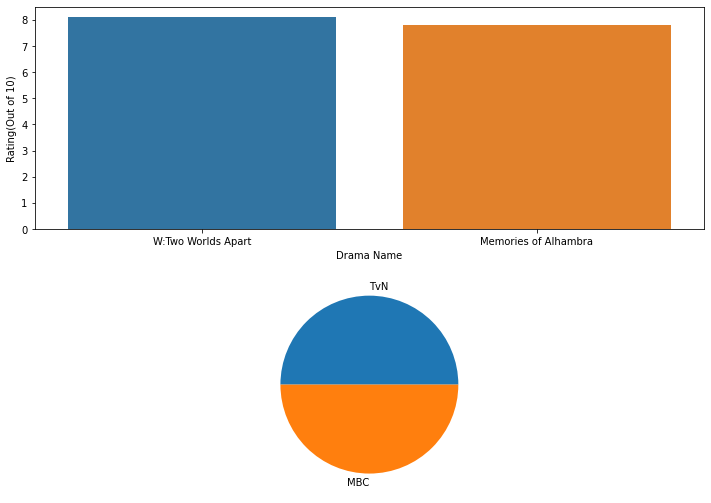

In [128]:
plt.figure(figsize=(12,9))
index_ = []
user = input("Enter the Writer name:")
for i in range(Writer.shape[0]):
    if user in Writer['Writer'][i]:
        print(Writer['Drama Name'][i])
        index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
plt.subplot(2,1,1)
sns.barplot(x='Drama Name',y='Rating(Out of 10)',data=result)
plt.subplot(2,1,2)
#pie, ax = plt.subplots(figsize=[10,9])
labels = result['Network'].value_counts().index.values.tolist()
plt.pie(x=result['Network'].value_counts().values.tolist(), labels=labels, pctdistance=0.5)
#plt.title(user, fontsize=14);
print("\nGenres that Writer has wrote with:")
z = result.iloc[:,6:]
col = set()
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        if z.iloc[i,j] == 1:
            col.add(z.columns[j])
print(col)     

##### TOP 5 Writers

In [129]:
index_ = []
wri_ = []
for i in range(Writer.shape[0]):
    for j in Writers_list:
        if j in Writer['Writer'][i]:
            wri_.append(j)
            index_.append(Writer[Writer['Drama Name'] == Writer['Drama Name'][i]])
result = pd.concat(index_)
result['Writer Name'] = wri_
result = result.drop(Genre_list,axis=1)
result = result.drop(['Writer','Year','Network'],axis=1)
result.groupby('Writer Name')['Rating(Out of 10)','Viewship Rate'].sum().sort_values(by=['Rating(Out of 10)','Viewship Rate'],ascending=[False,False]).head(5)

,Rating(Out of 10),Viewship Rate
Writer Name,,
Hong Jung-eun,45.5,55.577
Hong Mi-ran,45.5,55.577
Kim Eun-sook,41.5,76.660
Park Ji-eun,25.0,57.850
Park Hye-ryun,24.6,23.320


In [ ]:
#More updates to be done in future XD